# Compare Fold-Change and Chi-Squared Results
### Group 33, Florida Atlantic University
- Compare top-ranked features from fold-change and chi-squared feature selection methods.
- Identify overlapping and unique features.
- Save results for biomarker ranking and downstream analysis.


> Load and Inspect Data

In [1]:
# Load necessary libraries
import pandas as pd

# Load results from the results folder
fold_change_df = pd.read_csv('../results/fold_change_results.csv')
chi2_ranked_df = pd.read_csv('../results/chi_squared_features.csv')

# Inspect the datasets
print("Fold-change dataset:")
print("Columns:", fold_change_df.columns)
print(fold_change_df.head())

print("\nChi-squared dataset:")
print("Columns:", chi2_ranked_df.columns)
print(chi2_ranked_df.head())

Fold-change dataset:
Columns: Index(['Unnamed: 0', '0'], dtype='object')
       Unnamed: 0         0
0    hsa-mir-520a  8.776809
1    hsa-mir-520f  7.479981
2    hsa-mir-518c  7.341205
3  hsa-mir-516b-1  6.974440
4   hsa-mir-512-1  6.891411

Chi-squared dataset:
Columns: Index(['Feature', 'Chi2_Score', 'P_Value'], dtype='object')
        Feature  Chi2_Score       P_Value
0   hsa-mir-571   71.190977  1.272047e-14
1  hsa-mir-4663   38.356704  9.458739e-08
2  hsa-mir-3973   34.193548  6.800901e-07
3  hsa-mir-8082   34.193548  6.800901e-07
4  hsa-mir-451b   18.508169  9.815199e-04


> Clean and Align Datasets

In [2]:
# Clean fold-change dataset
if 'Unnamed: 0' in fold_change_df.columns:
    fold_change_df.rename(columns={"Unnamed: 0": "Feature", "0": "Score"}, inplace=True)

# Clean chi-squared dataset
chi2_ranked_df = chi2_ranked_df[['Feature', 'Chi2_Score']].rename(columns={'Chi2_Score': 'Score'})

# Ensure feature names are standardized
fold_change_df['Feature'] = fold_change_df['Feature'].astype(str).str.strip()
chi2_ranked_df['Feature'] = chi2_ranked_df['Feature'].astype(str).str.strip()

print("Cleaned datasets:")
print("\nFold-change:")
print(fold_change_df.head())
print("\nChi-squared:")
print(chi2_ranked_df.head())

Cleaned datasets:

Fold-change:
          Feature     Score
0    hsa-mir-520a  8.776809
1    hsa-mir-520f  7.479981
2    hsa-mir-518c  7.341205
3  hsa-mir-516b-1  6.974440
4   hsa-mir-512-1  6.891411

Chi-squared:
        Feature      Score
0   hsa-mir-571  71.190977
1  hsa-mir-4663  38.356704
2  hsa-mir-3973  34.193548
3  hsa-mir-8082  34.193548
4  hsa-mir-451b  18.508169


> Extract Top Features

In [6]:
# Set number of top features to compare
n_features = 500

# Get top features from both methods
top_fold_change = fold_change_df.head(n_features)['Feature'].tolist()
top_chi2 = chi2_ranked_df.head(n_features)['Feature'].tolist()

print(f"Number of features selected from each method: {n_features}")
print("\nExample fold-change features (first 5):")
for i, feature in enumerate(top_fold_change[:5], 1):
    score = fold_change_df[fold_change_df['Feature'] == feature]['Score'].iloc[0]
    print(f"{i}. {feature} (score: {score:.4f})")

print("\nExample chi-squared features (first 5):")
for i, feature in enumerate(top_chi2[:5], 1):
    score = chi2_ranked_df[chi2_ranked_df['Feature'] == feature]['Score'].iloc[0]
    print(f"{i}. {feature} (score: {score:.4f})")

Number of features selected from each method: 500

Example fold-change features (first 5):
1. hsa-mir-520a (score: 8.7768)
2. hsa-mir-520f (score: 7.4800)
3. hsa-mir-518c (score: 7.3412)
4. hsa-mir-516b-1 (score: 6.9744)
5. hsa-mir-512-1 (score: 6.8914)

Example chi-squared features (first 5):
1. hsa-mir-571 (score: 71.1910)
2. hsa-mir-4663 (score: 38.3567)
3. hsa-mir-3973 (score: 34.1935)
4. hsa-mir-8082 (score: 34.1935)
5. hsa-mir-451b (score: 18.5082)


> Find Overlapping Features

In [7]:
# Find overlapping features
overlaps = set(top_fold_change).intersection(set(top_chi2))

print(f"Number of overlapping features: {len(overlaps)}")
if overlaps:
    print("\nOverlapping features:")
    for feature in overlaps:
        fc_score = fold_change_df[fold_change_df['Feature'] == feature]['Score'].iloc[0]
        chi2_score = chi2_ranked_df[chi2_ranked_df['Feature'] == feature]['Score'].iloc[0]
        print(f"\n{feature}:")
        print(f"  Fold-change score: {fc_score:.4f}")
        print(f"  Chi-squared score: {chi2_score:.4f}")
else:
    print("\nNo overlapping features found")

Number of overlapping features: 111

Overlapping features:

hsa-mir-7974:
  Fold-change score: 0.7061
  Chi-squared score: 1.0647

hsa-mir-1298:
  Fold-change score: 4.3101
  Chi-squared score: 1.0734

hsa-mir-548au:
  Fold-change score: 0.5942
  Chi-squared score: 1.2311

hsa-mir-4461:
  Fold-change score: 1.9746
  Chi-squared score: 1.6350

hsa-mir-6087:
  Fold-change score: 1.0021
  Chi-squared score: 1.6411

hsa-mir-526b:
  Fold-change score: 6.4812
  Chi-squared score: 1.2166

hsa-mir-4435-2:
  Fold-change score: 2.4045
  Chi-squared score: 2.5263

hsa-mir-875:
  Fold-change score: 2.6021
  Chi-squared score: 1.6258

hsa-mir-519b:
  Fold-change score: 3.0118
  Chi-squared score: 1.1543

hsa-mir-5702:
  Fold-change score: 0.8670
  Chi-squared score: 2.1010

hsa-mir-3606:
  Fold-change score: 0.3617
  Chi-squared score: 1.0015

hsa-mir-512-1:
  Fold-change score: 6.8914
  Chi-squared score: 1.1418

hsa-mir-6738:
  Fold-change score: 0.9450
  Chi-squared score: 1.0802

hsa-mir-518a-2

> Save Results

In [8]:
# Create summary DataFrame
summary_data = {
    'Method': ['Fold Change', 'Chi-squared', 'Overlap'],
    'Number of Features': [len(top_fold_change), len(top_chi2), len(overlaps)]
}
summary_df = pd.DataFrame(summary_data)

# Save overlapping features if any exist
if overlaps:
    overlap_data = []
    for feature in overlaps:
        fc_score = fold_change_df[fold_change_df['Feature'] == feature]['Score'].iloc[0]
        chi2_score = chi2_ranked_df[chi2_ranked_df['Feature'] == feature]['Score'].iloc[0]
        overlap_data.append({
            'Feature': feature,
            'Fold_Change_Score': fc_score,
            'Chi_Squared_Score': chi2_score
        })
    overlap_df = pd.DataFrame(overlap_data)
    overlap_df.to_csv('../results/overlapping_features.csv', index=False)

# Save summary
summary_df.to_csv('../results/feature_comparison_summary.csv', index=False)

print("Results saved to results folder")
print("\nSummary:")
print(summary_df)

Results saved to results folder

Summary:
        Method  Number of Features
0  Fold Change                 500
1  Chi-squared                 500
2      Overlap                 111


> Visuals

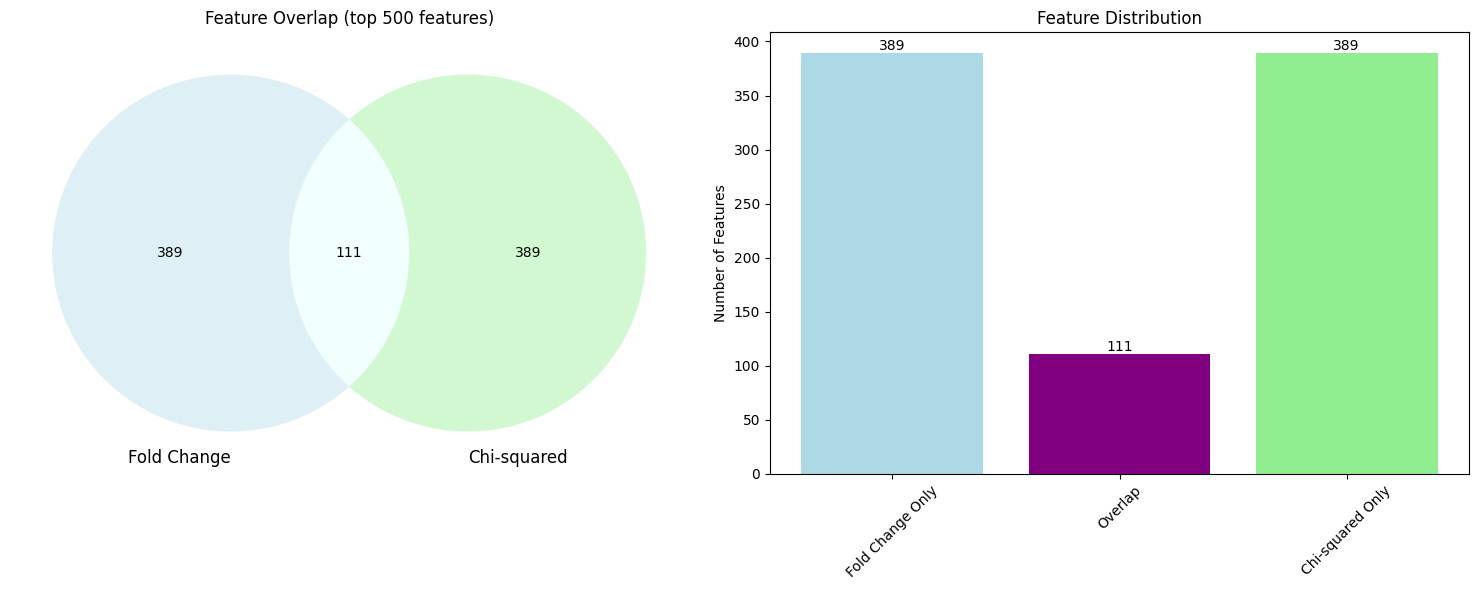

<Figure size 640x480 with 0 Axes>

In [9]:
# Import visualization libraries
import matplotlib.pyplot as plt
from matplotlib_venn import venn2  # you might need to: pip install matplotlib-venn
import seaborn as sns

# Create figure with two subplots
plt.figure(figsize=(15, 6))

# 1. Venn diagram of overlap
plt.subplot(1, 2, 1)
venn2([set(top_fold_change), set(top_chi2)],
      set_labels=('Fold Change', 'Chi-squared'),
      set_colors=('lightblue', 'lightgreen'))
plt.title(f'Feature Overlap (top {n_features} features)')

# 2. Bar plot showing feature counts
plt.subplot(1, 2, 2)
methods = ['Fold Change Only', 'Overlap', 'Chi-squared Only']
values = [
    len(set(top_fold_change) - set(top_chi2)),  # Unique to Fold Change
    len(overlaps),                              # Overlap
    len(set(top_chi2) - set(top_fold_change))   # Unique to Chi-squared
]

colors = ['lightblue', 'purple', 'lightgreen']
bars = plt.bar(methods, values, color=colors)
plt.title('Feature Distribution')
plt.xticks(rotation=45)
plt.ylabel('Number of Features')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Save the figure
plt.savefig('../results/feature_comparison_visualization.png', 
            bbox_inches='tight', 
            dpi=300)